In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [3]:
data = {
    "learningFilePath": '/Users/sangminlee/model-factory/restapiserver/src/main/resources/피마족_인디언_당뇨병_발병_데이터셋.csv',
    "modelPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/model.h5",
    "diagramPath": "/Users/sangminlee/model-factory/restapiserver/src/main/resources/78/diagram.svg",
    "prediction": "binary",
    "inputColumns": [
        "임신 횟수",
        "혈장 포도당 농도",
        "이완기 혈압",
        "삼두근 피부 두께",
        "혈청 인슐린",
        "체질량 지수",
        "당뇨 직계 가족력",
        "나이"
    ],
    "outputColumns": [
        "당뇨병 발병 여부"
    ],
    "batchSize": 64,
    "epoch": 1500,
    "lossFunction": "binary_crossentropy",
    "optimizerFunction": "adam",
    "memberId": 1,
    "layers": [
        {
            "number": 0,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 1,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 2,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 3,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 4,
            "activationFunction": "relu",
            "neuronCount": 256
        },
        {
            "number": 5,
            "activationFunction": "dropout",
            "neuronCount": 25
        },
        {
            "number": 6,
            "activationFunction": "sigmoid",
            "neuronCount": 1
        },
    ]
}

In [4]:
# 파일 불러오기
dataset = pd.read_csv(data['learningFilePath'])

# 학습셋, 검증셋, 시험셋 분리
x_train = dataset[data.get('inputColumns')].values.astype('float32')
train_length = int(len(x_train) * 0.7)
val_length = int(len(x_train) * 0.2)
x_test = x_train[train_length + val_length:]
x_val = x_train[train_length: train_length + val_length]
x_train = x_train[:train_length]

# 학습셋, 검증셋, 시험셋 분리
y_train = dataset[data.get('outputColumns')].values.astype('float32')
y_test = y_train[train_length + val_length:]
y_val = y_train[train_length: train_length + val_length]
y_train = y_train[:train_length]

x_length = len(x_test[0])
y_length = len(y_test[0])

In [15]:
early_stopping = EarlyStopping(patience=20)

In [18]:
# 3. 모델 구성하기
model = Sequential()
neuron = 256
drop = 0.25
model.add(Dense(neuron, input_dim=8, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(neuron, activation='relu'))
model.add(Dropout(drop))
model.add(Dense(neuron,activation='relu'))
model.add(Dropout(drop))
model.add(Dense(1, activation='sigmoid'))

# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5000, batch_size=64, callbacks=[early_stopping])

Epoch 1/5000
537/537 [==============================] - 0s 422us/step - loss: 2.9385 - accuracy: 0.5791
Epoch 2/5000
537/537 [==============================] - 0s 45us/step - loss: 2.7316 - accuracy: 0.5978
Epoch 3/5000
537/537 [==============================] - 0s 47us/step - loss: 1.8536 - accuracy: 0.5698
Epoch 4/5000
537/537 [==============================] - 0s 50us/step - loss: 1.3436 - accuracy: 0.6238
Epoch 5/5000
537/537 [==============================] - 0s 51us/step - loss: 1.2053 - accuracy: 0.5736
Epoch 6/5000
537/537 [==============================] - 0s 48us/step - loss: 1.2246 - accuracy: 0.5717
Epoch 7/5000
537/537 [==============================] - 0s 51us/step - loss: 0.9345 - accuracy: 0.6536
Epoch 8/5000
537/537 [==============================] - 0s 54us/step - loss: 0.9485 - accuracy: 0.5940
Epoch 9/5000
537/537 [==============================] - 0s 65us/step - loss: 0.8792 - accuracy: 0.6127
Epoch 10/5000
537/537 [==============================] - 0s 67us/step - 

537/537 [==============================] - 0s 49us/step - loss: 0.5808 - accuracy: 0.6983
Epoch 80/5000
537/537 [==============================] - 0s 45us/step - loss: 0.5826 - accuracy: 0.7188
Epoch 81/5000
537/537 [==============================] - 0s 49us/step - loss: 0.5892 - accuracy: 0.6946
Epoch 82/5000
537/537 [==============================] - 0s 44us/step - loss: 0.5734 - accuracy: 0.7020
Epoch 83/5000
537/537 [==============================] - 0s 39us/step - loss: 0.5706 - accuracy: 0.6946
Epoch 84/5000
537/537 [==============================] - 0s 43us/step - loss: 0.5791 - accuracy: 0.7076
Epoch 85/5000
537/537 [==============================] - 0s 41us/step - loss: 0.5790 - accuracy: 0.7058
Epoch 86/5000
537/537 [==============================] - 0s 42us/step - loss: 0.5644 - accuracy: 0.7095
Epoch 87/5000
537/537 [==============================] - 0s 41us/step - loss: 0.5249 - accuracy: 0.7412
Epoch 88/5000
537/537 [==============================] - 0s 43us/step - loss: 

537/537 [==============================] - 0s 52us/step - loss: 0.5199 - accuracy: 0.7151
Epoch 158/5000
537/537 [==============================] - 0s 52us/step - loss: 0.5000 - accuracy: 0.7337
Epoch 159/5000
537/537 [==============================] - 0s 53us/step - loss: 0.5254 - accuracy: 0.7244
Epoch 160/5000
537/537 [==============================] - 0s 45us/step - loss: 0.4969 - accuracy: 0.7486
Epoch 161/5000
537/537 [==============================] - 0s 52us/step - loss: 0.4989 - accuracy: 0.7449
Epoch 162/5000
537/537 [==============================] - 0s 46us/step - loss: 0.5122 - accuracy: 0.7356
Epoch 163/5000
537/537 [==============================] - 0s 41us/step - loss: 0.5083 - accuracy: 0.7356
Epoch 164/5000
537/537 [==============================] - 0s 42us/step - loss: 0.4990 - accuracy: 0.7393
Epoch 165/5000
537/537 [==============================] - 0s 44us/step - loss: 0.5094 - accuracy: 0.7523
Epoch 166/5000
537/537 [==============================] - 0s 50us/step

537/537 [==============================] - 0s 42us/step - loss: 0.4497 - accuracy: 0.7709
Epoch 236/5000
537/537 [==============================] - 0s 40us/step - loss: 0.4758 - accuracy: 0.7598
Epoch 237/5000
537/537 [==============================] - 0s 54us/step - loss: 0.4428 - accuracy: 0.7709
Epoch 238/5000
537/537 [==============================] - 0s 47us/step - loss: 0.4590 - accuracy: 0.7728
Epoch 239/5000
537/537 [==============================] - 0s 45us/step - loss: 0.4698 - accuracy: 0.7523
Epoch 240/5000
537/537 [==============================] - 0s 47us/step - loss: 0.4695 - accuracy: 0.7561
Epoch 241/5000
537/537 [==============================] - 0s 43us/step - loss: 0.4780 - accuracy: 0.7616
Epoch 242/5000
537/537 [==============================] - 0s 44us/step - loss: 0.4591 - accuracy: 0.7709
Epoch 243/5000
537/537 [==============================] - 0s 40us/step - loss: 0.4374 - accuracy: 0.7840
Epoch 244/5000
537/537 [==============================] - 0s 45us/step

537/537 [==============================] - 0s 48us/step - loss: 0.4169 - accuracy: 0.8119
Epoch 314/5000
537/537 [==============================] - 0s 48us/step - loss: 0.4046 - accuracy: 0.8026
Epoch 315/5000
537/537 [==============================] - 0s 46us/step - loss: 0.4246 - accuracy: 0.7747
Epoch 316/5000
537/537 [==============================] - 0s 46us/step - loss: 0.4008 - accuracy: 0.8045
Epoch 317/5000
537/537 [==============================] - 0s 46us/step - loss: 0.3977 - accuracy: 0.7970
Epoch 318/5000
537/537 [==============================] - 0s 46us/step - loss: 0.4284 - accuracy: 0.7914
Epoch 319/5000
537/537 [==============================] - 0s 45us/step - loss: 0.4256 - accuracy: 0.7858
Epoch 320/5000
537/537 [==============================] - 0s 48us/step - loss: 0.4030 - accuracy: 0.7914
Epoch 321/5000
537/537 [==============================] - 0s 45us/step - loss: 0.4081 - accuracy: 0.7970
Epoch 322/5000
537/537 [==============================] - 0s 49us/step

537/537 [==============================] - 0s 45us/step - loss: 0.3926 - accuracy: 0.7952
Epoch 392/5000
537/537 [==============================] - 0s 40us/step - loss: 0.3966 - accuracy: 0.8287
Epoch 393/5000
537/537 [==============================] - 0s 43us/step - loss: 0.3730 - accuracy: 0.8250
Epoch 394/5000
537/537 [==============================] - 0s 42us/step - loss: 0.3832 - accuracy: 0.8212
Epoch 395/5000
537/537 [==============================] - 0s 46us/step - loss: 0.3773 - accuracy: 0.8250
Epoch 396/5000
537/537 [==============================] - 0s 40us/step - loss: 0.3674 - accuracy: 0.8119
Epoch 397/5000
537/537 [==============================] - 0s 39us/step - loss: 0.3654 - accuracy: 0.8231
Epoch 398/5000
537/537 [==============================] - 0s 44us/step - loss: 0.3648 - accuracy: 0.8175
Epoch 399/5000
537/537 [==============================] - 0s 40us/step - loss: 0.3790 - accuracy: 0.8343
Epoch 400/5000
537/537 [==============================] - 0s 44us/step

537/537 [==============================] - 0s 40us/step - loss: 0.3281 - accuracy: 0.8492
Epoch 470/5000
537/537 [==============================] - 0s 37us/step - loss: 0.3560 - accuracy: 0.8454
Epoch 471/5000
537/537 [==============================] - 0s 39us/step - loss: 0.3451 - accuracy: 0.8287
Epoch 472/5000
537/537 [==============================] - 0s 41us/step - loss: 0.3394 - accuracy: 0.8436
Epoch 473/5000
537/537 [==============================] - 0s 40us/step - loss: 0.3343 - accuracy: 0.8510
Epoch 474/5000
537/537 [==============================] - 0s 40us/step - loss: 0.3355 - accuracy: 0.8473
Epoch 475/5000
537/537 [==============================] - 0s 43us/step - loss: 0.3454 - accuracy: 0.8380
Epoch 476/5000
537/537 [==============================] - 0s 41us/step - loss: 0.3343 - accuracy: 0.8473
Epoch 477/5000
537/537 [==============================] - 0s 39us/step - loss: 0.3523 - accuracy: 0.8287
Epoch 478/5000
537/537 [==============================] - 0s 39us/step

537/537 [==============================] - 0s 41us/step - loss: 0.3014 - accuracy: 0.8473
Epoch 548/5000
537/537 [==============================] - 0s 43us/step - loss: 0.3209 - accuracy: 0.8603
Epoch 549/5000
537/537 [==============================] - 0s 44us/step - loss: 0.2958 - accuracy: 0.8399
Epoch 550/5000
537/537 [==============================] - 0s 44us/step - loss: 0.3146 - accuracy: 0.8547
Epoch 551/5000
537/537 [==============================] - 0s 44us/step - loss: 0.3234 - accuracy: 0.8454
Epoch 552/5000
537/537 [==============================] - 0s 47us/step - loss: 0.2906 - accuracy: 0.8771
Epoch 553/5000
537/537 [==============================] - 0s 70us/step - loss: 0.2964 - accuracy: 0.8659
Epoch 554/5000
537/537 [==============================] - 0s 59us/step - loss: 0.3014 - accuracy: 0.8678
Epoch 555/5000
537/537 [==============================] - 0s 56us/step - loss: 0.3059 - accuracy: 0.8678
Epoch 556/5000
537/537 [==============================] - 0s 45us/step

537/537 [==============================] - 0s 49us/step - loss: 0.2644 - accuracy: 0.8883
Epoch 626/5000
537/537 [==============================] - 0s 53us/step - loss: 0.2483 - accuracy: 0.8771
Epoch 627/5000
537/537 [==============================] - 0s 55us/step - loss: 0.2328 - accuracy: 0.8920
Epoch 628/5000
537/537 [==============================] - 0s 49us/step - loss: 0.2330 - accuracy: 0.8845
Epoch 629/5000
537/537 [==============================] - 0s 50us/step - loss: 0.2726 - accuracy: 0.8864
Epoch 630/5000
537/537 [==============================] - 0s 50us/step - loss: 0.3006 - accuracy: 0.8752
Epoch 631/5000
537/537 [==============================] - 0s 48us/step - loss: 0.2984 - accuracy: 0.8659
Epoch 632/5000
537/537 [==============================] - 0s 49us/step - loss: 0.2781 - accuracy: 0.8715
Epoch 633/5000
537/537 [==============================] - 0s 53us/step - loss: 0.2604 - accuracy: 0.8678
Epoch 634/5000
537/537 [==============================] - 0s 45us/step

537/537 [==============================] - 0s 40us/step - loss: 0.2338 - accuracy: 0.8957
Epoch 704/5000
537/537 [==============================] - 0s 44us/step - loss: 0.2387 - accuracy: 0.8864
Epoch 705/5000
537/537 [==============================] - 0s 42us/step - loss: 0.2149 - accuracy: 0.8957
Epoch 706/5000
537/537 [==============================] - 0s 41us/step - loss: 0.2344 - accuracy: 0.8864
Epoch 707/5000
537/537 [==============================] - 0s 40us/step - loss: 0.2654 - accuracy: 0.8845
Epoch 708/5000
537/537 [==============================] - 0s 41us/step - loss: 0.2259 - accuracy: 0.9032
Epoch 709/5000
537/537 [==============================] - 0s 42us/step - loss: 0.2062 - accuracy: 0.9162
Epoch 710/5000
537/537 [==============================] - 0s 41us/step - loss: 0.2263 - accuracy: 0.8957
Epoch 711/5000
537/537 [==============================] - 0s 42us/step - loss: 0.2259 - accuracy: 0.9032
Epoch 712/5000
537/537 [==============================] - 0s 40us/step

537/537 [==============================] - 0s 46us/step - loss: 0.2022 - accuracy: 0.9181
Epoch 782/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1973 - accuracy: 0.9181
Epoch 783/5000
537/537 [==============================] - 0s 44us/step - loss: 0.2070 - accuracy: 0.9181
Epoch 784/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1728 - accuracy: 0.9274
Epoch 785/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1902 - accuracy: 0.9125
Epoch 786/5000
537/537 [==============================] - 0s 51us/step - loss: 0.2290 - accuracy: 0.8976
Epoch 787/5000
537/537 [==============================] - 0s 44us/step - loss: 0.2094 - accuracy: 0.8994
Epoch 788/5000
537/537 [==============================] - 0s 42us/step - loss: 0.2196 - accuracy: 0.8920
Epoch 789/5000
537/537 [==============================] - 0s 40us/step - loss: 0.2354 - accuracy: 0.8901
Epoch 790/5000
537/537 [==============================] - 0s 41us/step

537/537 [==============================] - 0s 45us/step - loss: 0.1789 - accuracy: 0.9218
Epoch 860/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1576 - accuracy: 0.9311
Epoch 861/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1650 - accuracy: 0.9236
Epoch 862/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1578 - accuracy: 0.9404
Epoch 863/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1811 - accuracy: 0.9125
Epoch 864/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1989 - accuracy: 0.9181
Epoch 865/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1828 - accuracy: 0.9255
Epoch 866/5000
537/537 [==============================] - 0s 44us/step - loss: 0.1840 - accuracy: 0.9125
Epoch 867/5000
537/537 [==============================] - 0s 48us/step - loss: 0.1640 - accuracy: 0.9236
Epoch 868/5000
537/537 [==============================] - 0s 51us/step

537/537 [==============================] - 0s 40us/step - loss: 0.1321 - accuracy: 0.9553
Epoch 938/5000
537/537 [==============================] - 0s 44us/step - loss: 0.1403 - accuracy: 0.9385
Epoch 939/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1991 - accuracy: 0.9088
Epoch 940/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1755 - accuracy: 0.9143
Epoch 941/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1839 - accuracy: 0.9255
Epoch 942/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1498 - accuracy: 0.9441
Epoch 943/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1695 - accuracy: 0.9330
Epoch 944/5000
537/537 [==============================] - 0s 49us/step - loss: 0.2060 - accuracy: 0.9181
Epoch 945/5000
537/537 [==============================] - 0s 49us/step - loss: 0.2218 - accuracy: 0.9143
Epoch 946/5000
537/537 [==============================] - 0s 51us/step

537/537 [==============================] - 0s 43us/step - loss: 0.1331 - accuracy: 0.9553
Epoch 1016/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1766 - accuracy: 0.9330
Epoch 1017/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1329 - accuracy: 0.9404
Epoch 1018/5000
537/537 [==============================] - 0s 48us/step - loss: 0.1384 - accuracy: 0.9311
Epoch 1019/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1775 - accuracy: 0.9143
Epoch 1020/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1395 - accuracy: 0.9460
Epoch 1021/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1722 - accuracy: 0.9330
Epoch 1022/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1925 - accuracy: 0.9274
Epoch 1023/5000
537/537 [==============================] - 0s 44us/step - loss: 0.1492 - accuracy: 0.9385
Epoch 1024/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 44us/step - loss: 0.1462 - accuracy: 0.9348
Epoch 1093/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1537 - accuracy: 0.9348
Epoch 1094/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1549 - accuracy: 0.9385
Epoch 1095/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1536 - accuracy: 0.9441
Epoch 1096/5000
537/537 [==============================] - 0s 43us/step - loss: 0.2005 - accuracy: 0.9069
Epoch 1097/5000
537/537 [==============================] - 0s 50us/step - loss: 0.1920 - accuracy: 0.9143
Epoch 1098/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1606 - accuracy: 0.9348
Epoch 1099/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1499 - accuracy: 0.9348
Epoch 1100/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1418 - accuracy: 0.9460
Epoch 1101/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 46us/step - loss: 0.1428 - accuracy: 0.9516
Epoch 1170/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1288 - accuracy: 0.9516
Epoch 1171/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1544 - accuracy: 0.9441
Epoch 1172/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1541 - accuracy: 0.9385
Epoch 1173/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1530 - accuracy: 0.9367
Epoch 1174/5000
537/537 [==============================] - 0s 62us/step - loss: 0.1209 - accuracy: 0.9628
Epoch 1175/5000
537/537 [==============================] - 0s 61us/step - loss: 0.1284 - accuracy: 0.9479
Epoch 1176/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1080 - accuracy: 0.9479
Epoch 1177/5000
537/537 [==============================] - 0s 49us/step - loss: 0.1277 - accuracy: 0.9609
Epoch 1178/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 45us/step - loss: 0.1676 - accuracy: 0.9441
Epoch 1247/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1936 - accuracy: 0.9404
Epoch 1248/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1810 - accuracy: 0.9348
Epoch 1249/5000
537/537 [==============================] - 0s 48us/step - loss: 0.1798 - accuracy: 0.9404
Epoch 1250/5000
537/537 [==============================] - 0s 49us/step - loss: 0.1429 - accuracy: 0.9404
Epoch 1251/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1470 - accuracy: 0.9423
Epoch 1252/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1324 - accuracy: 0.9572
Epoch 1253/5000
537/537 [==============================] - 0s 47us/step - loss: 0.0998 - accuracy: 0.9646
Epoch 1254/5000
537/537 [==============================] - 0s 48us/step - loss: 0.1225 - accuracy: 0.9460
Epoch 1255/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 47us/step - loss: 0.1466 - accuracy: 0.9404
Epoch 1324/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1209 - accuracy: 0.9404
Epoch 1325/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1469 - accuracy: 0.9311
Epoch 1326/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1020 - accuracy: 0.9646
Epoch 1327/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1382 - accuracy: 0.9516
Epoch 1328/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1096 - accuracy: 0.9609
Epoch 1329/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1308 - accuracy: 0.9516
Epoch 1330/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1342 - accuracy: 0.9497
Epoch 1331/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1348 - accuracy: 0.9479
Epoch 1332/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 55us/step - loss: 0.1188 - accuracy: 0.9479
Epoch 1401/5000
537/537 [==============================] - 0s 50us/step - loss: 0.1258 - accuracy: 0.9534
Epoch 1402/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1273 - accuracy: 0.9534
Epoch 1403/5000
537/537 [==============================] - 0s 53us/step - loss: 0.0997 - accuracy: 0.9553
Epoch 1404/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1204 - accuracy: 0.9516
Epoch 1405/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1350 - accuracy: 0.9516
Epoch 1406/5000
537/537 [==============================] - 0s 49us/step - loss: 0.1456 - accuracy: 0.9534
Epoch 1407/5000
537/537 [==============================] - 0s 52us/step - loss: 0.1536 - accuracy: 0.9404
Epoch 1408/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1315 - accuracy: 0.9404
Epoch 1409/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 47us/step - loss: 0.1327 - accuracy: 0.9516
Epoch 1478/5000
537/537 [==============================] - 0s 62us/step - loss: 0.1023 - accuracy: 0.9646
Epoch 1479/5000
537/537 [==============================] - 0s 57us/step - loss: 0.0993 - accuracy: 0.9609
Epoch 1480/5000
537/537 [==============================] - 0s 59us/step - loss: 0.1325 - accuracy: 0.9479
Epoch 1481/5000
537/537 [==============================] - 0s 59us/step - loss: 0.1334 - accuracy: 0.9479
Epoch 1482/5000
537/537 [==============================] - 0s 59us/step - loss: 0.1495 - accuracy: 0.9404
Epoch 1483/5000
537/537 [==============================] - 0s 58us/step - loss: 0.1384 - accuracy: 0.9460
Epoch 1484/5000
537/537 [==============================] - 0s 57us/step - loss: 0.1529 - accuracy: 0.9311
Epoch 1485/5000
537/537 [==============================] - 0s 65us/step - loss: 0.0862 - accuracy: 0.9721
Epoch 1486/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 54us/step - loss: 0.1144 - accuracy: 0.9590
Epoch 1555/5000
537/537 [==============================] - 0s 74us/step - loss: 0.1305 - accuracy: 0.9460
Epoch 1556/5000
537/537 [==============================] - 0s 77us/step - loss: 0.1560 - accuracy: 0.9441
Epoch 1557/5000
537/537 [==============================] - 0s 68us/step - loss: 0.1136 - accuracy: 0.9516
Epoch 1558/5000
537/537 [==============================] - 0s 83us/step - loss: 0.1265 - accuracy: 0.9516
Epoch 1559/5000
537/537 [==============================] - 0s 79us/step - loss: 0.1550 - accuracy: 0.9441
Epoch 1560/5000
537/537 [==============================] - 0s 85us/step - loss: 0.1317 - accuracy: 0.9479
Epoch 1561/5000
537/537 [==============================] - 0s 47us/step - loss: 0.1064 - accuracy: 0.9590
Epoch 1562/5000
537/537 [==============================] - 0s 39us/step - loss: 0.1365 - accuracy: 0.9385
Epoch 1563/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 42us/step - loss: 0.0984 - accuracy: 0.9646
Epoch 1632/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1119 - accuracy: 0.9590
Epoch 1633/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1151 - accuracy: 0.9572
Epoch 1634/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0753 - accuracy: 0.9739
Epoch 1635/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1112 - accuracy: 0.9609
Epoch 1636/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0957 - accuracy: 0.9534
Epoch 1637/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1058 - accuracy: 0.9646
Epoch 1638/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1179 - accuracy: 0.9497
Epoch 1639/5000
537/537 [==============================] - 0s 72us/step - loss: 0.1435 - accuracy: 0.9367
Epoch 1640/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 63us/step - loss: 0.1045 - accuracy: 0.9590
Epoch 1709/5000
537/537 [==============================] - 0s 54us/step - loss: 0.0829 - accuracy: 0.9683
Epoch 1710/5000
537/537 [==============================] - 0s 59us/step - loss: 0.1033 - accuracy: 0.9683
Epoch 1711/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1244 - accuracy: 0.9646
Epoch 1712/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1354 - accuracy: 0.9534
Epoch 1713/5000
537/537 [==============================] - 0s 62us/step - loss: 0.0947 - accuracy: 0.9572
Epoch 1714/5000
537/537 [==============================] - 0s 59us/step - loss: 0.0961 - accuracy: 0.9609
Epoch 1715/5000
537/537 [==============================] - 0s 44us/step - loss: 0.1246 - accuracy: 0.9609
Epoch 1716/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1118 - accuracy: 0.9590
Epoch 1717/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 47us/step - loss: 0.1209 - accuracy: 0.9590
Epoch 1786/5000
537/537 [==============================] - 0s 56us/step - loss: 0.1031 - accuracy: 0.9683
Epoch 1787/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0505 - accuracy: 0.9870
Epoch 1788/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1134 - accuracy: 0.9572
Epoch 1789/5000
537/537 [==============================] - 0s 45us/step - loss: 0.1153 - accuracy: 0.9665
Epoch 1790/5000
537/537 [==============================] - 0s 51us/step - loss: 0.1168 - accuracy: 0.9534
Epoch 1791/5000
537/537 [==============================] - 0s 50us/step - loss: 0.0884 - accuracy: 0.9609
Epoch 1792/5000
537/537 [==============================] - 0s 49us/step - loss: 0.0869 - accuracy: 0.9665
Epoch 1793/5000
537/537 [==============================] - 0s 48us/step - loss: 0.0832 - accuracy: 0.9628
Epoch 1794/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 116us/step - loss: 0.0773 - accuracy: 0.9683
Epoch 1863/5000
537/537 [==============================] - 0s 73us/step - loss: 0.1064 - accuracy: 0.9665
Epoch 1864/5000
537/537 [==============================] - 0s 67us/step - loss: 0.0486 - accuracy: 0.9832
Epoch 1865/5000
537/537 [==============================] - 0s 61us/step - loss: 0.0805 - accuracy: 0.9721
Epoch 1866/5000
537/537 [==============================] - 0s 66us/step - loss: 0.0680 - accuracy: 0.9628
Epoch 1867/5000
537/537 [==============================] - 0s 51us/step - loss: 0.0766 - accuracy: 0.9609
Epoch 1868/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0575 - accuracy: 0.9795
Epoch 1869/5000
537/537 [==============================] - 0s 53us/step - loss: 0.0972 - accuracy: 0.9628
Epoch 1870/5000
537/537 [==============================] - 0s 53us/step - loss: 0.1069 - accuracy: 0.9590
Epoch 1871/5000
537/537 [==============================] - 0s

537/537 [==============================] - 0s 42us/step - loss: 0.1217 - accuracy: 0.9721
Epoch 1940/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0910 - accuracy: 0.9683
Epoch 1941/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0935 - accuracy: 0.9609
Epoch 1942/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0672 - accuracy: 0.9702
Epoch 1943/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0882 - accuracy: 0.9683
Epoch 1944/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0864 - accuracy: 0.9628
Epoch 1945/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0972 - accuracy: 0.9702
Epoch 1946/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1021 - accuracy: 0.9646
Epoch 1947/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0935 - accuracy: 0.9702
Epoch 1948/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 36us/step - loss: 0.1361 - accuracy: 0.9553
Epoch 2017/5000
537/537 [==============================] - 0s 38us/step - loss: 0.1083 - accuracy: 0.9553
Epoch 2018/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0962 - accuracy: 0.9534
Epoch 2019/5000
537/537 [==============================] - 0s 37us/step - loss: 0.1021 - accuracy: 0.9721
Epoch 2020/5000
537/537 [==============================] - 0s 38us/step - loss: 0.1068 - accuracy: 0.9572
Epoch 2021/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0944 - accuracy: 0.9646
Epoch 2022/5000
537/537 [==============================] - 0s 36us/step - loss: 0.0786 - accuracy: 0.9739
Epoch 2023/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0752 - accuracy: 0.9721
Epoch 2024/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0887 - accuracy: 0.9739
Epoch 2025/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.1343 - accuracy: 0.9590
Epoch 2094/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0694 - accuracy: 0.9758
Epoch 2095/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0559 - accuracy: 0.9851
Epoch 2096/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0690 - accuracy: 0.9739
Epoch 2097/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0657 - accuracy: 0.9777
Epoch 2098/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0582 - accuracy: 0.9795
Epoch 2099/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0797 - accuracy: 0.9777
Epoch 2100/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0749 - accuracy: 0.9739
Epoch 2101/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0755 - accuracy: 0.9739
Epoch 2102/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.1301 - accuracy: 0.9628
Epoch 2171/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1626 - accuracy: 0.9423
Epoch 2172/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1365 - accuracy: 0.9460
Epoch 2173/5000
537/537 [==============================] - 0s 39us/step - loss: 0.1191 - accuracy: 0.9479
Epoch 2174/5000
537/537 [==============================] - 0s 37us/step - loss: 0.1020 - accuracy: 0.9609
Epoch 2175/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0906 - accuracy: 0.9665
Epoch 2176/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1164 - accuracy: 0.9572
Epoch 2177/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0858 - accuracy: 0.9721
Epoch 2178/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0683 - accuracy: 0.9777
Epoch 2179/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.1001 - accuracy: 0.9665
Epoch 2248/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0921 - accuracy: 0.9702
Epoch 2249/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1056 - accuracy: 0.9628
Epoch 2250/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0662 - accuracy: 0.9739
Epoch 2251/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0838 - accuracy: 0.9683
Epoch 2252/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0793 - accuracy: 0.9665
Epoch 2253/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0846 - accuracy: 0.9721
Epoch 2254/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0882 - accuracy: 0.9646
Epoch 2255/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0920 - accuracy: 0.9665
Epoch 2256/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 44us/step - loss: 0.0744 - accuracy: 0.9683
Epoch 2325/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1071 - accuracy: 0.9590
Epoch 2326/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0619 - accuracy: 0.9758
Epoch 2327/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0705 - accuracy: 0.9721
Epoch 2328/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0704 - accuracy: 0.9665
Epoch 2329/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0730 - accuracy: 0.9721
Epoch 2330/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0912 - accuracy: 0.9683
Epoch 2331/5000
537/537 [==============================] - 0s 53us/step - loss: 0.0770 - accuracy: 0.9646
Epoch 2332/5000
537/537 [==============================] - 0s 47us/step - loss: 0.0580 - accuracy: 0.9832
Epoch 2333/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.1248 - accuracy: 0.9534
Epoch 2402/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0956 - accuracy: 0.9665
Epoch 2403/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1088 - accuracy: 0.9497
Epoch 2404/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0863 - accuracy: 0.9702
Epoch 2405/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0853 - accuracy: 0.9758
Epoch 2406/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0823 - accuracy: 0.9665
Epoch 2407/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0793 - accuracy: 0.9683
Epoch 2408/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0789 - accuracy: 0.9758
Epoch 2409/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0750 - accuracy: 0.9702
Epoch 2410/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0588 - accuracy: 0.9814
Epoch 2479/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0424 - accuracy: 0.9851
Epoch 2480/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0527 - accuracy: 0.9814
Epoch 2481/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0764 - accuracy: 0.9683
Epoch 2482/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0588 - accuracy: 0.9721
Epoch 2483/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0748 - accuracy: 0.9795
Epoch 2484/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0368 - accuracy: 0.9870
Epoch 2485/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0723 - accuracy: 0.9777
Epoch 2486/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0528 - accuracy: 0.9870
Epoch 2487/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0891 - accuracy: 0.9628
Epoch 2556/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0933 - accuracy: 0.9665
Epoch 2557/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1156 - accuracy: 0.9590
Epoch 2558/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0895 - accuracy: 0.9721
Epoch 2559/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0558 - accuracy: 0.9795
Epoch 2560/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0693 - accuracy: 0.9777
Epoch 2561/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0569 - accuracy: 0.9777
Epoch 2562/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0654 - accuracy: 0.9777
Epoch 2563/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0577 - accuracy: 0.9777
Epoch 2564/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 45us/step - loss: 0.0724 - accuracy: 0.9777
Epoch 2633/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0705 - accuracy: 0.9721
Epoch 2634/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0681 - accuracy: 0.9795
Epoch 2635/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0825 - accuracy: 0.9646
Epoch 2636/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0630 - accuracy: 0.9721
Epoch 2637/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0858 - accuracy: 0.9721
Epoch 2638/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0653 - accuracy: 0.9795
Epoch 2639/5000
537/537 [==============================] - 0s 43us/step - loss: 0.1068 - accuracy: 0.9646
Epoch 2640/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0949 - accuracy: 0.9479
Epoch 2641/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 45us/step - loss: 0.0396 - accuracy: 0.9907
Epoch 2710/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0566 - accuracy: 0.9777
Epoch 2711/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0790 - accuracy: 0.9814
Epoch 2712/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0444 - accuracy: 0.9795
Epoch 2713/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0823 - accuracy: 0.9646
Epoch 2714/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0313 - accuracy: 0.9907
Epoch 2715/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1026 - accuracy: 0.9646
Epoch 2716/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0791 - accuracy: 0.9628
Epoch 2717/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1015 - accuracy: 0.9572
Epoch 2718/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0917 - accuracy: 0.9590
Epoch 2787/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1294 - accuracy: 0.9646
Epoch 2788/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1063 - accuracy: 0.9441
Epoch 2789/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0665 - accuracy: 0.9888
Epoch 2790/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0847 - accuracy: 0.9665
Epoch 2791/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0775 - accuracy: 0.9702
Epoch 2792/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0991 - accuracy: 0.9702
Epoch 2793/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0687 - accuracy: 0.9721
Epoch 2794/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0841 - accuracy: 0.9739
Epoch 2795/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.0733 - accuracy: 0.9721
Epoch 2864/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0764 - accuracy: 0.9683
Epoch 2865/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0697 - accuracy: 0.9739
Epoch 2866/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1095 - accuracy: 0.9646
Epoch 2867/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0895 - accuracy: 0.9777
Epoch 2868/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0578 - accuracy: 0.9851
Epoch 2869/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0726 - accuracy: 0.9758
Epoch 2870/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0482 - accuracy: 0.9851
Epoch 2871/5000
537/537 [==============================] - 0s 48us/step - loss: 0.0789 - accuracy: 0.9702
Epoch 2872/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 43us/step - loss: 0.0530 - accuracy: 0.9832
Epoch 2941/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0490 - accuracy: 0.9832
Epoch 2942/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0792 - accuracy: 0.9814
Epoch 2943/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0541 - accuracy: 0.9795
Epoch 2944/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0603 - accuracy: 0.9777
Epoch 2945/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0864 - accuracy: 0.9683
Epoch 2946/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0532 - accuracy: 0.9795
Epoch 2947/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0725 - accuracy: 0.9702
Epoch 2948/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0661 - accuracy: 0.9758
Epoch 2949/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 37us/step - loss: 0.0396 - accuracy: 0.9870
Epoch 3018/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0700 - accuracy: 0.9739
Epoch 3019/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0646 - accuracy: 0.9739
Epoch 3020/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0510 - accuracy: 0.9851
Epoch 3021/5000
537/537 [==============================] - 0s 47us/step - loss: 0.0714 - accuracy: 0.9758
Epoch 3022/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0573 - accuracy: 0.9851
Epoch 3023/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0690 - accuracy: 0.9758
Epoch 3024/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0547 - accuracy: 0.9832
Epoch 3025/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0874 - accuracy: 0.9721
Epoch 3026/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0686 - accuracy: 0.9795
Epoch 3095/5000
537/537 [==============================] - 0s 42us/step - loss: 0.1236 - accuracy: 0.9590
Epoch 3096/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0763 - accuracy: 0.9777
Epoch 3097/5000
537/537 [==============================] - 0s 49us/step - loss: 0.0799 - accuracy: 0.9702
Epoch 3098/5000
537/537 [==============================] - 0s 48us/step - loss: 0.1037 - accuracy: 0.9590
Epoch 3099/5000
537/537 [==============================] - 0s 49us/step - loss: 0.0828 - accuracy: 0.9721
Epoch 3100/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0859 - accuracy: 0.9683
Epoch 3101/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0704 - accuracy: 0.9758
Epoch 3102/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0940 - accuracy: 0.9609
Epoch 3103/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0573 - accuracy: 0.9721
Epoch 3172/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0344 - accuracy: 0.9944
Epoch 3173/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0576 - accuracy: 0.9795
Epoch 3174/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0686 - accuracy: 0.9777
Epoch 3175/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0626 - accuracy: 0.9758
Epoch 3176/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0817 - accuracy: 0.9683
Epoch 3177/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0801 - accuracy: 0.9646
Epoch 3178/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0870 - accuracy: 0.9683
Epoch 3179/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0735 - accuracy: 0.9758
Epoch 3180/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 43us/step - loss: 0.0777 - accuracy: 0.9721
Epoch 3249/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0598 - accuracy: 0.9777
Epoch 3250/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0680 - accuracy: 0.9721
Epoch 3251/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0507 - accuracy: 0.9814
Epoch 3252/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0496 - accuracy: 0.9814
Epoch 3253/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0564 - accuracy: 0.9795
Epoch 3254/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0472 - accuracy: 0.9832
Epoch 3255/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0549 - accuracy: 0.9758
Epoch 3256/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0718 - accuracy: 0.9646
Epoch 3257/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 42us/step - loss: 0.0420 - accuracy: 0.9832
Epoch 3326/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0321 - accuracy: 0.9926
Epoch 3327/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0806 - accuracy: 0.9777
Epoch 3328/5000
537/537 [==============================] - 0s 48us/step - loss: 0.0545 - accuracy: 0.9758
Epoch 3329/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0440 - accuracy: 0.9870
Epoch 3330/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0484 - accuracy: 0.9851
Epoch 3331/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0394 - accuracy: 0.9851
Epoch 3332/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0332 - accuracy: 0.9888
Epoch 3333/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0766 - accuracy: 0.9665
Epoch 3334/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.0998 - accuracy: 0.9665
Epoch 3403/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0638 - accuracy: 0.9758
Epoch 3404/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0845 - accuracy: 0.9758
Epoch 3405/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0670 - accuracy: 0.9758
Epoch 3406/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0589 - accuracy: 0.9777
Epoch 3407/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0752 - accuracy: 0.9777
Epoch 3408/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0635 - accuracy: 0.9777
Epoch 3409/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0836 - accuracy: 0.9721
Epoch 3410/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0674 - accuracy: 0.9739
Epoch 3411/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0631 - accuracy: 0.9795
Epoch 3480/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0853 - accuracy: 0.9721
Epoch 3481/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0615 - accuracy: 0.9832
Epoch 3482/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0525 - accuracy: 0.9814
Epoch 3483/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0509 - accuracy: 0.9777
Epoch 3484/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0604 - accuracy: 0.9795
Epoch 3485/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0422 - accuracy: 0.9926
Epoch 3486/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0460 - accuracy: 0.9777
Epoch 3487/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0524 - accuracy: 0.9870
Epoch 3488/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 47us/step - loss: 0.0362 - accuracy: 0.9907
Epoch 3557/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0573 - accuracy: 0.9832
Epoch 3558/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0603 - accuracy: 0.9795
Epoch 3559/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0817 - accuracy: 0.9814
Epoch 3560/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0723 - accuracy: 0.9739
Epoch 3561/5000
537/537 [==============================] - 0s 39us/step - loss: 0.1002 - accuracy: 0.9590
Epoch 3562/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0555 - accuracy: 0.9795
Epoch 3563/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0562 - accuracy: 0.9758
Epoch 3564/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0600 - accuracy: 0.9739
Epoch 3565/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 45us/step - loss: 0.0653 - accuracy: 0.9851
Epoch 3634/5000
537/537 [==============================] - 0s 47us/step - loss: 0.0802 - accuracy: 0.9721
Epoch 3635/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0767 - accuracy: 0.9758
Epoch 3636/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0852 - accuracy: 0.9665
Epoch 3637/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0546 - accuracy: 0.9814
Epoch 3638/5000
537/537 [==============================] - 0s 41us/step - loss: 0.1045 - accuracy: 0.9646
Epoch 3639/5000
537/537 [==============================] - 0s 37us/step - loss: 0.1311 - accuracy: 0.9609
Epoch 3640/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0828 - accuracy: 0.9646
Epoch 3641/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0895 - accuracy: 0.9721
Epoch 3642/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0384 - accuracy: 0.9870
Epoch 3711/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0286 - accuracy: 0.9888
Epoch 3712/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9870
Epoch 3713/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0383 - accuracy: 0.9851
Epoch 3714/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0655 - accuracy: 0.9739
Epoch 3715/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0489 - accuracy: 0.9814
Epoch 3716/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0541 - accuracy: 0.9777
Epoch 3717/5000
537/537 [==============================] - 0s 46us/step - loss: 0.1032 - accuracy: 0.9646
Epoch 3718/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0392 - accuracy: 0.9907
Epoch 3719/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0607 - accuracy: 0.9777
Epoch 3788/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0587 - accuracy: 0.9907
Epoch 3789/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0735 - accuracy: 0.9795
Epoch 3790/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0604 - accuracy: 0.9795
Epoch 3791/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0816 - accuracy: 0.9739
Epoch 3792/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0479 - accuracy: 0.9851
Epoch 3793/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0601 - accuracy: 0.9702
Epoch 3794/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0729 - accuracy: 0.9758
Epoch 3795/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0577 - accuracy: 0.9795
Epoch 3796/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 37us/step - loss: 0.0676 - accuracy: 0.9721
Epoch 3865/5000
537/537 [==============================] - 0s 38us/step - loss: 0.1093 - accuracy: 0.9702
Epoch 3866/5000
537/537 [==============================] - 0s 39us/step - loss: 0.1171 - accuracy: 0.9609
Epoch 3867/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0709 - accuracy: 0.9777
Epoch 3868/5000
537/537 [==============================] - 0s 36us/step - loss: 0.0671 - accuracy: 0.9795
Epoch 3869/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0769 - accuracy: 0.9758
Epoch 3870/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0711 - accuracy: 0.9739
Epoch 3871/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0433 - accuracy: 0.9851
Epoch 3872/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0427 - accuracy: 0.9814
Epoch 3873/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 42us/step - loss: 0.0501 - accuracy: 0.9832
Epoch 3942/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0274 - accuracy: 0.9926
Epoch 3943/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0640 - accuracy: 0.9832
Epoch 3944/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0672 - accuracy: 0.9739
Epoch 3945/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0672 - accuracy: 0.9758
Epoch 3946/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0593 - accuracy: 0.9814
Epoch 3947/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0527 - accuracy: 0.9870
Epoch 3948/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0682 - accuracy: 0.9851
Epoch 3949/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0485 - accuracy: 0.9795
Epoch 3950/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0400 - accuracy: 0.9851
Epoch 4019/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0419 - accuracy: 0.9888
Epoch 4020/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0653 - accuracy: 0.9851
Epoch 4021/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0387 - accuracy: 0.9870
Epoch 4022/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0344 - accuracy: 0.9851
Epoch 4023/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0476 - accuracy: 0.9814
Epoch 4024/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0434 - accuracy: 0.9814
Epoch 4025/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0386 - accuracy: 0.9814
Epoch 4026/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0540 - accuracy: 0.9832
Epoch 4027/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.0694 - accuracy: 0.9851
Epoch 4096/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0750 - accuracy: 0.9795
Epoch 4097/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0752 - accuracy: 0.9665
Epoch 4098/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0555 - accuracy: 0.9758
Epoch 4099/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0531 - accuracy: 0.9777
Epoch 4100/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0402 - accuracy: 0.9851
Epoch 4101/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0539 - accuracy: 0.9870
Epoch 4102/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0580 - accuracy: 0.9721
Epoch 4103/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0933 - accuracy: 0.9739
Epoch 4104/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0526 - accuracy: 0.9814
Epoch 4173/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0595 - accuracy: 0.9795
Epoch 4174/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0571 - accuracy: 0.9758
Epoch 4175/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0683 - accuracy: 0.9795
Epoch 4176/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0615 - accuracy: 0.9777
Epoch 4177/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0722 - accuracy: 0.9721
Epoch 4178/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0316 - accuracy: 0.9870
Epoch 4179/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0942 - accuracy: 0.9739
Epoch 4180/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0563 - accuracy: 0.9721
Epoch 4181/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 41us/step - loss: 0.0507 - accuracy: 0.9814
Epoch 4250/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0688 - accuracy: 0.9832
Epoch 4251/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0792 - accuracy: 0.9777
Epoch 4252/5000
537/537 [==============================] - 0s 40us/step - loss: 0.1409 - accuracy: 0.9572
Epoch 4253/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0567 - accuracy: 0.9758
Epoch 4254/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0601 - accuracy: 0.9832
Epoch 4255/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0399 - accuracy: 0.9907
Epoch 4256/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0646 - accuracy: 0.9870
Epoch 4257/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0461 - accuracy: 0.9814
Epoch 4258/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0127 - accuracy: 0.9981
Epoch 4327/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0333 - accuracy: 0.9851
Epoch 4328/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0406 - accuracy: 0.9907
Epoch 4329/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0555 - accuracy: 0.9832
Epoch 4330/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0528 - accuracy: 0.9926
Epoch 4331/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0272 - accuracy: 0.9926
Epoch 4332/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0339 - accuracy: 0.9907
Epoch 4333/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0325 - accuracy: 0.9870
Epoch 4334/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0196 - accuracy: 0.9963
Epoch 4335/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 38us/step - loss: 0.0429 - accuracy: 0.9795
Epoch 4404/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0941 - accuracy: 0.9628
Epoch 4405/5000
537/537 [==============================] - 0s 45us/step - loss: 0.0836 - accuracy: 0.9795
Epoch 4406/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0708 - accuracy: 0.9739
Epoch 4407/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0844 - accuracy: 0.9758
Epoch 4408/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0969 - accuracy: 0.9683
Epoch 4409/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0815 - accuracy: 0.9721
Epoch 4410/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0711 - accuracy: 0.9721
Epoch 4411/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0759 - accuracy: 0.9721
Epoch 4412/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0392 - accuracy: 0.9870
Epoch 4481/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0603 - accuracy: 0.9795
Epoch 4482/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0611 - accuracy: 0.9758
Epoch 4483/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0536 - accuracy: 0.9758
Epoch 4484/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0609 - accuracy: 0.9683
Epoch 4485/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0526 - accuracy: 0.9795
Epoch 4486/5000
537/537 [==============================] - 0s 37us/step - loss: 0.0827 - accuracy: 0.9758
Epoch 4487/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0533 - accuracy: 0.9870
Epoch 4488/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0676 - accuracy: 0.9758
Epoch 4489/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 39us/step - loss: 0.0509 - accuracy: 0.9795
Epoch 4558/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0344 - accuracy: 0.9888
Epoch 4559/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0646 - accuracy: 0.9777
Epoch 4560/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0482 - accuracy: 0.9777
Epoch 4561/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0216 - accuracy: 0.9963
Epoch 4562/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0318 - accuracy: 0.9832
Epoch 4563/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0365 - accuracy: 0.9888
Epoch 4564/5000
537/537 [==============================] - 0s 42us/step - loss: 0.0696 - accuracy: 0.9832
Epoch 4565/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0526 - accuracy: 0.9832
Epoch 4566/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0582 - accuracy: 0.9777
Epoch 4635/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0946 - accuracy: 0.9777
Epoch 4636/5000
537/537 [==============================] - 0s 50us/step - loss: 0.0625 - accuracy: 0.9758
Epoch 4637/5000
537/537 [==============================] - 0s 51us/step - loss: 0.0357 - accuracy: 0.9851
Epoch 4638/5000
537/537 [==============================] - 0s 48us/step - loss: 0.0543 - accuracy: 0.9795
Epoch 4639/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0474 - accuracy: 0.9851
Epoch 4640/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0354 - accuracy: 0.9888
Epoch 4641/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0581 - accuracy: 0.9814
Epoch 4642/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0642 - accuracy: 0.9777
Epoch 4643/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 40us/step - loss: 0.0521 - accuracy: 0.9832
Epoch 4712/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0949 - accuracy: 0.9665
Epoch 4713/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0495 - accuracy: 0.9758
Epoch 4714/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0514 - accuracy: 0.9721
Epoch 4715/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0895 - accuracy: 0.9665
Epoch 4716/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0783 - accuracy: 0.9721
Epoch 4717/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0709 - accuracy: 0.9758
Epoch 4718/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0557 - accuracy: 0.9795
Epoch 4719/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0482 - accuracy: 0.9758
Epoch 4720/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 38us/step - loss: 0.0209 - accuracy: 0.9907
Epoch 4789/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0201 - accuracy: 0.9888
Epoch 4790/5000
537/537 [==============================] - 0s 43us/step - loss: 0.0673 - accuracy: 0.9777
Epoch 4791/5000
537/537 [==============================] - 0s 44us/step - loss: 0.0437 - accuracy: 0.9851
Epoch 4792/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0523 - accuracy: 0.9721
Epoch 4793/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0830 - accuracy: 0.9721
Epoch 4794/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0292 - accuracy: 0.9888
Epoch 4795/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0607 - accuracy: 0.9795
Epoch 4796/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0316 - accuracy: 0.9888
Epoch 4797/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 42us/step - loss: 0.0570 - accuracy: 0.9758
Epoch 4866/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0746 - accuracy: 0.9683
Epoch 4867/5000
537/537 [==============================] - 0s 39us/step - loss: 0.1128 - accuracy: 0.9553
Epoch 4868/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0889 - accuracy: 0.9609
Epoch 4869/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0756 - accuracy: 0.9683
Epoch 4870/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0751 - accuracy: 0.9777
Epoch 4871/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0765 - accuracy: 0.9814
Epoch 4872/5000
537/537 [==============================] - 0s 39us/step - loss: 0.0601 - accuracy: 0.9758
Epoch 4873/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0723 - accuracy: 0.9739
Epoch 4874/5000
537/537 [==============================] - 0s 

537/537 [==============================] - 0s 53us/step - loss: 0.0757 - accuracy: 0.9739
Epoch 4943/5000
537/537 [==============================] - 0s 55us/step - loss: 0.0586 - accuracy: 0.9721
Epoch 4944/5000
537/537 [==============================] - 0s 47us/step - loss: 0.0558 - accuracy: 0.9777
Epoch 4945/5000
537/537 [==============================] - 0s 46us/step - loss: 0.0308 - accuracy: 0.9888
Epoch 4946/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0440 - accuracy: 0.9832
Epoch 4947/5000
537/537 [==============================] - 0s 40us/step - loss: 0.0539 - accuracy: 0.9814
Epoch 4948/5000
537/537 [==============================] - 0s 38us/step - loss: 0.0289 - accuracy: 0.9926
Epoch 4949/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0552 - accuracy: 0.9814
Epoch 4950/5000
537/537 [==============================] - 0s 41us/step - loss: 0.0454 - accuracy: 0.9851
Epoch 4951/5000
537/537 [==============================] - 0s 

In [20]:
def review (model, hist):
    scores = model.evaluate(x_test, y_test)
    print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))

    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()
    
def visualize(model):
    return SVG(model_to_dot(model, show_shapes=True, dpi=65)
                .create(prog='dot', format='svg'))

In [27]:
model = Sequential()
layers = data.get('layers')

# {
#     "number": 0,
#     "activationFunction": "relu",
#     "neuronCount": 256
# },
# {
#     "number": 1,
#     "activationFunction": "dropout",
#     "neuronCount": 25
# },
# {
#     "number": 2,
#     "activationFunction": "relu",
#     "neuronCount": 256
# },
# {
#     "number": 3,
#     "activationFunction": "dropout",
#     "neuronCount": 25
# },
# {
#     "number": 4,
#     "activationFunction": "relu",
#     "neuronCount": 256
# },
# {
#     "number": 5,
#     "activationFunction": "dropout",
#     "neuronCount": 25
# },
# {
#     "number": 6,
#     "activationFunction": "sigmoid",
#     "neuronCount": 1
# },

for i in range(len(layers)):
    if i == 0:
        model.add(
            Dense(
                layers[i]['neuronCount'],
                input_dim = x_length,
                activation = layers[i]['activationFunction']))
    elif i == len(layers) - 1:
        model.add(Dense(y_length))
    else:
        model.add(
            Dense(
                layers[i]['neuronCount'],
                activation = layers[i]['activationFunction']))
        
model.compile(optimizer=data.get('optimizerFunction'),
                loss=data.get('lossFunction'),
                metrics=['accuracy'])

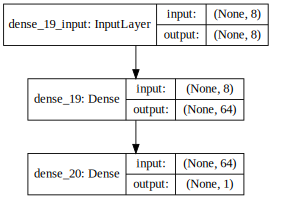

In [28]:
visualize(model)

In [29]:
hist = model.fit(x_train, y_train, epochs=data.get('epoch'), batch_size=data.get('batchSize'))

Epoch 1/1500
537/537 [==============================] - 0s 209us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 2/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 3/1500
537/537 [==============================] - 0s 24us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 4/1500
537/537 [==============================] - 0s 25us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 5/1500
537/537 [==============================] - 0s 22us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 6/1500
537/537 [==============================] - 0s 24us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 7/1500
537/537 [==============================] - 0s 26us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 8/1500
537/537 [==============================] - 0s 27us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 9/1500
537/537 [==============================] - 0s 28us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 10/1500
537/537 [=============

537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 152/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 153/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 154/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 155/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 156/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 157/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 158/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 159/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 160/1500
537/537 [==========

537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 302/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 303/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 304/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 305/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 306/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 307/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 308/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 309/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 310/1500
537/537 [==========

537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 452/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 453/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 454/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 455/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 456/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 457/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 458/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 459/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 460/1500
537/537 [==========

537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 602/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 603/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 604/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 605/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 606/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 607/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 608/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 609/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 610/1500
537/537 [==========

537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 752/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 753/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 754/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 755/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 756/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 757/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 758/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 759/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 760/1500
537/537 [==========

537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 902/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 903/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 904/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 905/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 906/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 907/1500
537/537 [==============================] - 0s 14us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 908/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 909/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 910/1500
537/537 [==========

537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1051/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1052/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1053/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1054/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1055/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1056/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1057/1500
537/537 [==============================] - 0s 16us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1058/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1059/1500
537/537 [=

537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1199/1500
537/537 [==============================] - 0s 20us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1200/1500
537/537 [==============================] - 0s 20us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1201/1500
537/537 [==============================] - 0s 20us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1202/1500
537/537 [==============================] - 0s 20us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1203/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1204/1500
537/537 [==============================] - 0s 23us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1205/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1206/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1207/1500
537/537 [=

537/537 [==============================] - 0s 35us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1347/1500
537/537 [==============================] - 0s 39us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1348/1500
537/537 [==============================] - 0s 31us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1349/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1350/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1351/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1352/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1353/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1354/1500
537/537 [==============================] - 0s 17us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1355/1500
537/537 [=

537/537 [==============================] - 0s 24us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1495/1500
537/537 [==============================] - 0s 20us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1496/1500
537/537 [==============================] - 0s 18us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1497/1500
537/537 [==============================] - 0s 19us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1498/1500
537/537 [==============================] - 0s 26us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1499/1500
537/537 [==============================] - 0s 24us/step - loss: 9.9366 - accuracy: 0.0000e+00
Epoch 1500/1500
537/537 [==============================] - 0s 21us/step - loss: 9.9366 - accuracy: 0.0000e+00


78/78 [==============================] - 0s 556us/step
accuracy: 71.79%


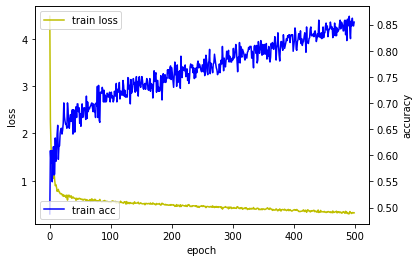

In [48]:
# neuron = 256
# dropout = 0.25
# epoch = 1500
review(model, hist)

78/78 [==============================] - 0s 542us/step
accuracy: 69.23%


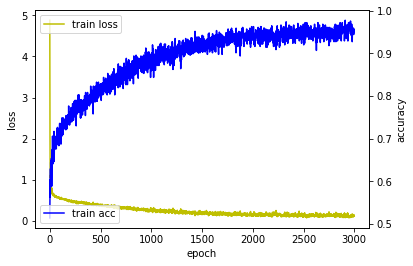

In [8]:
# neuron = 256
# dropout = 0.25
# epoch = 3000
review(model, hist)

78/78 [==============================] - 0s 575us/step
accuracy: 60.26%


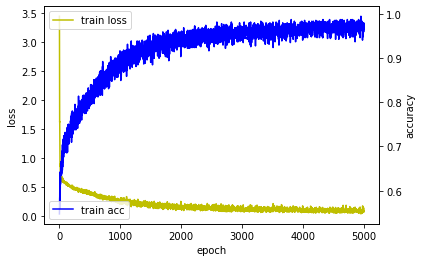

In [10]:
# neuron = 512
# dropout = 0.35
# epoch = 5000
review(model, hist)

78/78 [==============================] - 0s 659us/step
accuracy: 67.95%


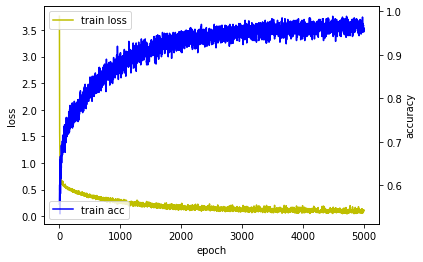

In [14]:
# neuron = 512
# dropout = 0.35
# epoch = 5000
# early = 100
review(model, hist)

78/78 [==============================] - 0s 546us/step
accuracy: 62.82%


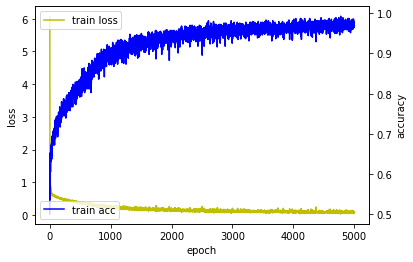

In [17]:
# neuron = 512
# dropout = 0.35
# epoch = 5000
# early = 20
review(model, hist)

78/78 [==============================] - 0s 107us/step
accuracy: 65.38%


KeyError: 'val_loss'

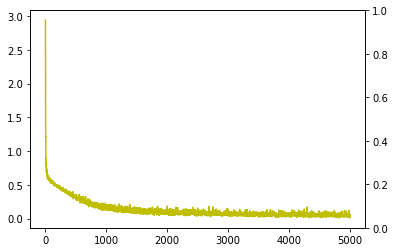

In [21]:
# neuron = 256
# dropout = 0.25
# epoch = 5000
# early = 20
review(model, hist)